# 4.2.4.2 Ensemble Methods

## Explanation of Ensemble Methods

Ensemble Methods combine multiple individual models to create a single, robust model that often performs better than any of the individual models alone. They are powerful techniques for improving classification performance.


### Types of Ensemble Methods

1. **Bagging (Bootstrap Aggregating)**:
   - **Description**: Bagging involves training multiple base models on different subsets of the training data (created using bootstrap sampling) and averaging their predictions. This reduces variance and helps in preventing overfitting.
   - **Applications**: Commonly used with decision trees, as seen in the Random Forest algorithm.

2. **Boosting**:
   - **Description**: Boosting trains models sequentially, with each model trying to correct the errors of the previous one. The final prediction is a weighted sum of the predictions from all models. This reduces bias and can create highly accurate models.
   - **Variants**: Includes algorithms like AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost.
   - **Applications**: Effective for various classification tasks, especially where high accuracy is required.

3. **Stacking**:
   - **Description**: Stacking involves training multiple base models and using their predictions as input features to a meta-model, which makes the final prediction. This leverages the strengths of different models.
   - **Applications**: Used in machine learning competitions and scenarios requiring robust and diverse model ensembles.


___
___

### Readings:
- [Ensemble Learning — Part 1](https://prof-frenzel.medium.com/kb-ensemble-learning-part-1-048976b8681b)
- [Ensemble Learning — Part 2 — Bagging](https://prof-frenzel.medium.com/kb-ensemble-learning-part-1-048976b8681b)
- [Ensemble Learning — Part 3 — Boosting](https://prof-frenzel.medium.com/kb-ensemble-learning-part-3-boosting-e405028e1d1c)
- [What is Bagging in Machine Learning?](https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples)
- [Ensemble Learning: Bagging & Boosting](https://readmedium.com/en/https:/towardsdatascience.com/ensemble-learning-bagging-boosting-3098079e5422)

___
___

## 1. Bagging 
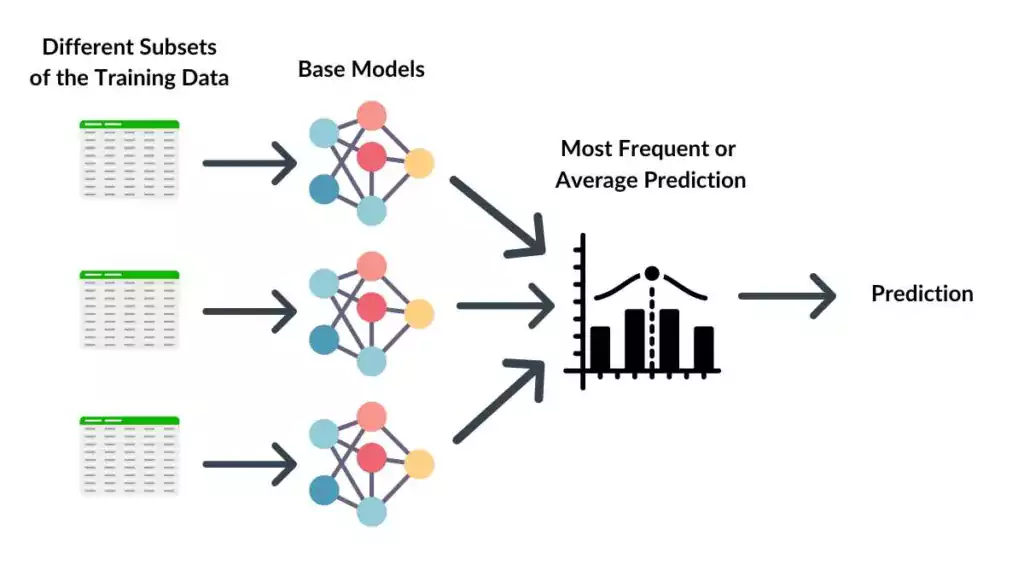

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model
base_model = DecisionTreeClassifier()

# Initialize and train the Bagging classifier
bagging_clf = BaggingClassifier(base_model, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      0.93      0.93        28
           2       0.94      0.94      0.94        33
           3       0.97      0.97      0.97        34
           4       0.92      1.00      0.96        46
           5       0.98      0.96      0.97        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       0.93      0.93      0.93        30
           9       0.97      0.93      0.95        40

    accuracy                           0.96       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.96      0.96       360



___
## 2. Boosting

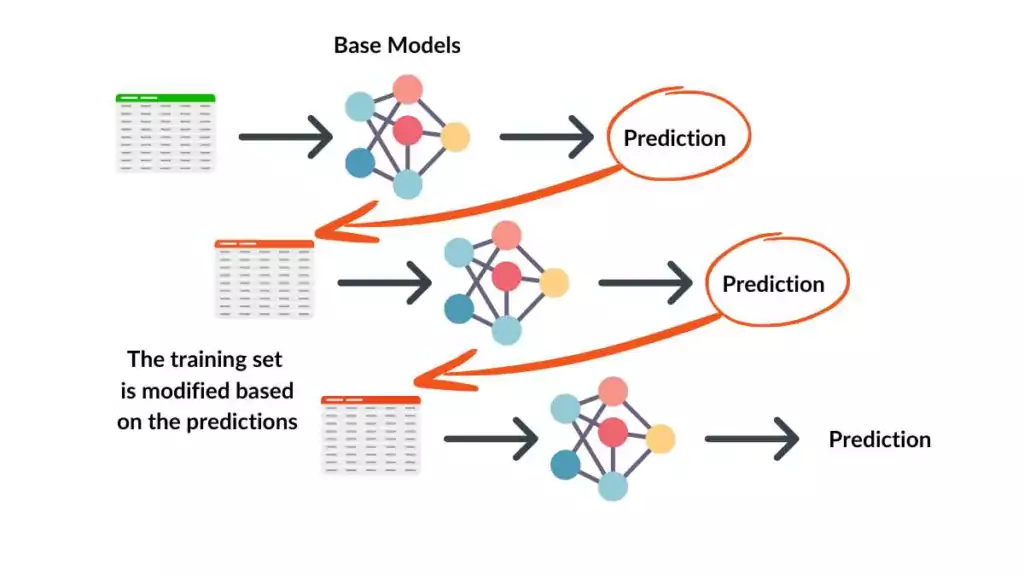

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.93      0.93      0.93        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



___
## 3. Stacking

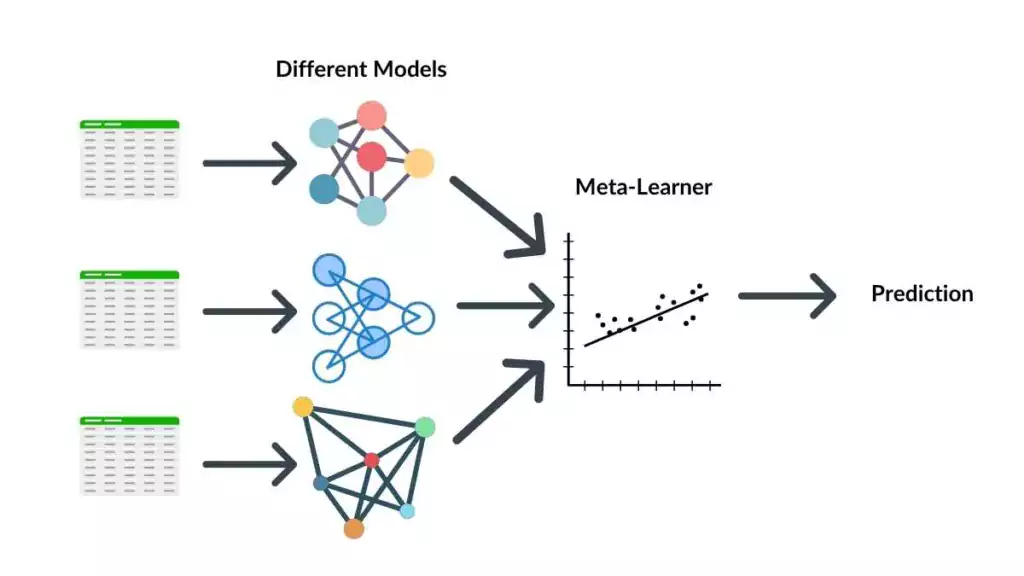

In [3]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# Define meta-model
meta_model = LogisticRegression()

# Initialize and train the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## Conclusion

Ensemble Methods, including Bagging, Boosting, and Stacking, are powerful techniques for improving classification performance by combining multiple models. Bagging reduces variance by averaging predictions from multiple models trained on different subsets of the data. Boosting reduces bias by training models sequentially, with each model correcting errors from the previous one. Stacking leverages the strengths of different models by using their predictions as input features to a meta-model. Implementing these methods in Python using libraries like Scikit-learn and XGBoost can significantly enhance the performance and robustness of classification models.
